                                                       MACHINE LEARNING PROJECT 4
                                                       
                                            LEARNING:SUPERVISED MACHINE LEARNING(CLASSIFICATION)

                                                      ✨ PROBLEM STATEMENT ✨

The aim is to develop a supervised machine learning model that, based on DNA sequence features (such as nucleotide composition, k-mer frequencies, sequence length, and mutation indicators), can predict the level of disease risk (High, Medium, Low) for an individual.

                                                              ✨EDA✨

EDA IS EXPLORATORY DATA ANALYSIS IT IS THE PROCESS OF UNDERSTANDING AND EXAMINING THE DATASET BEFORE APPLYING TO ANY MACHINE LEARNING MODEL OR STATISTICS.IT ACTS AS DETECTIVE WORK WHERE WE WORK FOR EXPLORING THE DATA TO FIND PATTERNS,TRENDS AND ANAMOLIES AND RELATIONSHIPS.

In [51]:
#STEP 1 ::: READ THE DATASET AND KNOW THE DATATYPE AND OTHER INFORMATION.
import pandas as pd
df=pd.read_csv("dna.csv")
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_ID        1000 non-null   object 
 1   Sequence         1000 non-null   object 
 2   GC_Content       1000 non-null   float64
 3   AT_Content       1000 non-null   float64
 4   Sequence_Length  1000 non-null   int64  
 5   Num_A            1000 non-null   int64  
 6   Num_T            1000 non-null   int64  
 7   Num_C            1000 non-null   int64  
 8   Num_G            1000 non-null   int64  
 9   kmer_3_freq      1000 non-null   float64
 10  Mutation_Flag    1000 non-null   int64  
 11  Class_Label      1000 non-null   object 
 12  Disease_Risk     1000 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 101.7+ KB
None
       GC_Content  AT_Content  Sequence_Length        Num_A        Num_T  \
count  1000.00000  1000.00000           1000.0  1000.000000

In [52]:
#STEP 2 ::: CHECK IF THERE ARE ANY NULL VALUES,WHAT ARE THE NAME OF THE COLUMNS ALSO FIND HOW MANY DUPILICATED VALUES ARE PRESENT.
print(df.columns)
print(df.isnull().sum())
print(df.duplicated())
print(df.drop_duplicates())

Index(['Sample_ID', 'Sequence', 'GC_Content', 'AT_Content', 'Sequence_Length',
       'Num_A', 'Num_T', 'Num_C', 'Num_G', 'kmer_3_freq', 'Mutation_Flag',
       'Class_Label', 'Disease_Risk'],
      dtype='object')
Sample_ID          0
Sequence           0
GC_Content         0
AT_Content         0
Sequence_Length    0
Num_A              0
Num_T              0
Num_C              0
Num_G              0
kmer_3_freq        0
Mutation_Flag      0
Class_Label        0
Disease_Risk       0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool
       Sample_ID                                           Sequence  \
0       SAMPLE_1  CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCG...   
1       SAMPLE_2  TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCA...   
2       SAMPLE_3  GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTA...   
3       SAMPLE_4  ACTACGCGGACAAGAACCAACAGAACCT

In [53]:
#STEP 3 ::: CHECK EACH COLUMNS UNIQUE VALUES AND ALSO DROP THE COLUMNS WHICH DOESN'T CONTRIBUTE OR CAN BE NOISY AND DOES'T PROVIDE OR HELP TO MAKE PREDICTIONS AND DOES OVERFITTING.
#FIDN THE COLUMN NAME OF EACH DATASET.
print(df.columns)
#FIND THAT IF THE DATASET CONTAINS ANY UNIQUE VALUE OR NOT FOR STANDARDIZATION OF THE DATA.
print(df['Class_Label'].unique())
#DROP THE COLUMNS WHICH ARE NOT USEFUL AND CAN CAUSE OVERFITTING OR MAKE WRONG PREDICITIONS.
df=df.drop(columns='Sample_ID',axis=1)
df=df.drop(columns="Sequence",axis=1)
df=df.drop(columns='Sequence_Length',axis=1)
print(df.columns)

Index(['Sample_ID', 'Sequence', 'GC_Content', 'AT_Content', 'Sequence_Length',
       'Num_A', 'Num_T', 'Num_C', 'Num_G', 'kmer_3_freq', 'Mutation_Flag',
       'Class_Label', 'Disease_Risk'],
      dtype='object')
['Bacteria' 'Virus' 'Human' 'Plant']
Index(['GC_Content', 'AT_Content', 'Num_A', 'Num_T', 'Num_C', 'Num_G',
       'kmer_3_freq', 'Mutation_Flag', 'Class_Label', 'Disease_Risk'],
      dtype='object')


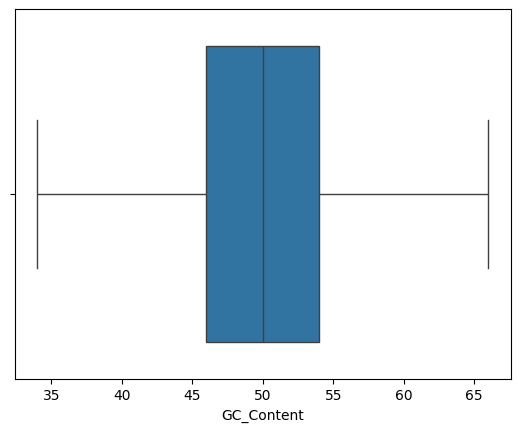

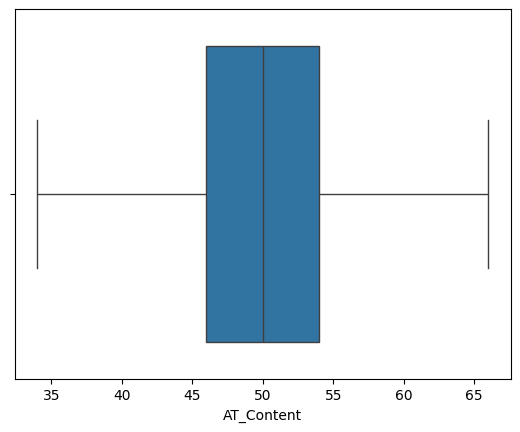

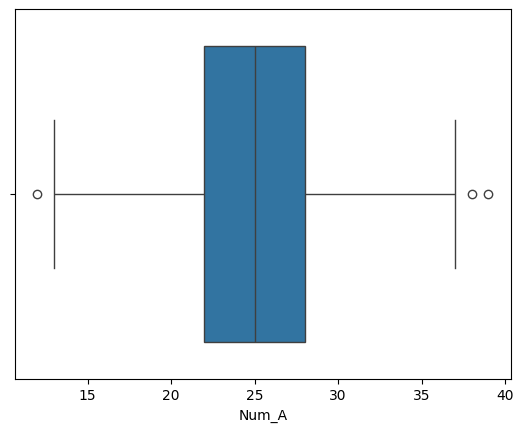

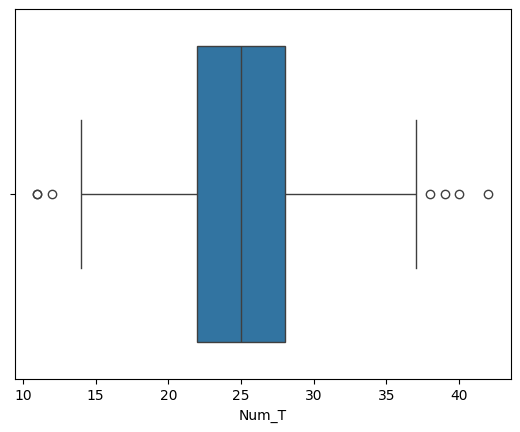

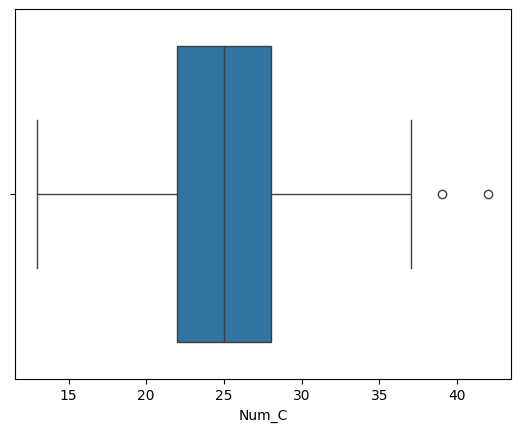

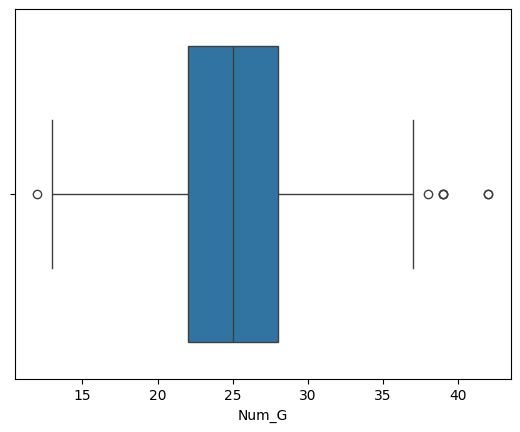

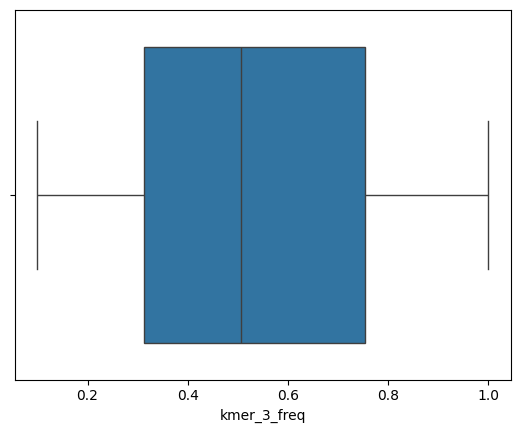

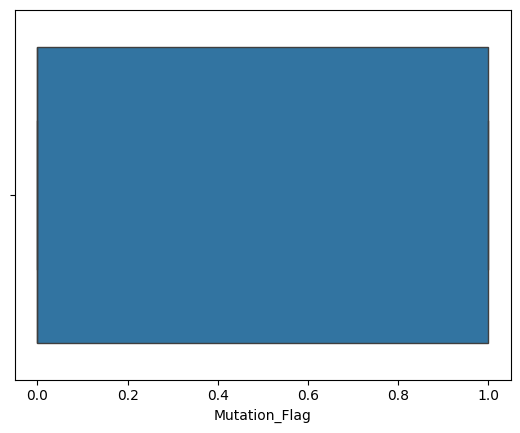

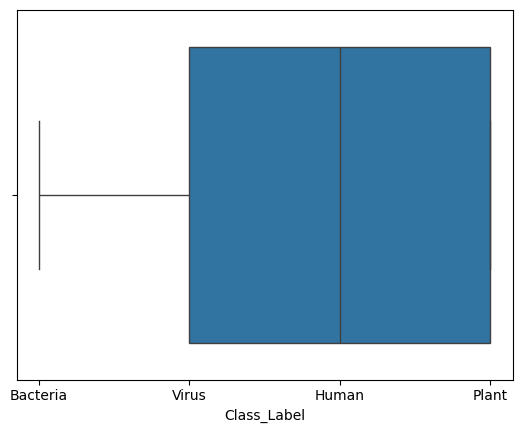

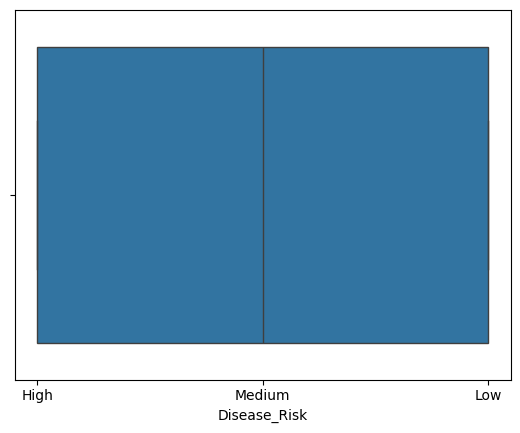

In [54]:
#STEP 4 ::: NOW CHECK FOR THE OULTINERS IN EACH OF THE COLUMNS.
import seaborn as sns
import matplotlib.pyplot as plt
column=df.columns
for a in column:
    sns.boxplot(x=df[a])
    plt.show()

In [55]:
#STEP 5 ::: CONVERT THE NON NUMERICAL COLUMNS INTO THE NUMERICAL COLUMNS FOR BETTER FITTING AND AVOIDING THE WRONG PREDICTIONS.
#YOU CAN EITHER USE MAP OR REPLACE OR ONE HOT ENCODING.
print(df['Class_Label'].unique())
df['Class_Label']=df['Class_Label'].str.strip().str.title()#STR IS USED TO SELECT THE STRING ITEM OF THAT COLUMN,STRIP() METHOD IS USED THERE CONTAINS ANY EXTRA SPACES,AND TITLE() METHOD IS USED TO CONVERT THE FIRST LETTER IN UPPERCASE AND THE OTHER LETTER IN THE LOWER CASE.
df['Class_Label']=df['Class_Label'].map({'Bacteria':0, 'Virus':1, 'Human':2,'Plant':3})
print(df['Disease_Risk'].unique())
df['Disease_Risk']=df['Disease_Risk'].str.strip().str.title()
df['Disease_Risk']=df['Disease_Risk'].map({'High':0, 'Medium':1, 'Low':2})
print(df.info())
print(df.head())
sdf=df.copy()
#sdf=sdf.drop(columns="Sample_ID",axis=1)
#sdf=sdf.drop(columns="Sequence",axis=1)
#sdf=sdf.drop(columns="Sequence_Length",axis=1)
print(sdf.info())

['Bacteria' 'Virus' 'Human' 'Plant']
['High' 'Medium' 'Low']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GC_Content     1000 non-null   float64
 1   AT_Content     1000 non-null   float64
 2   Num_A          1000 non-null   int64  
 3   Num_T          1000 non-null   int64  
 4   Num_C          1000 non-null   int64  
 5   Num_G          1000 non-null   int64  
 6   kmer_3_freq    1000 non-null   float64
 7   Mutation_Flag  1000 non-null   int64  
 8   Class_Label    1000 non-null   int64  
 9   Disease_Risk   1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.3 KB
None
   GC_Content  AT_Content  Num_A  Num_T  Num_C  Num_G  kmer_3_freq  \
0        50.0        50.0     22     28     19     31        0.986   
1        45.0        55.0     27     28     22     23        0.486   
2        51.0        49.0     26     23

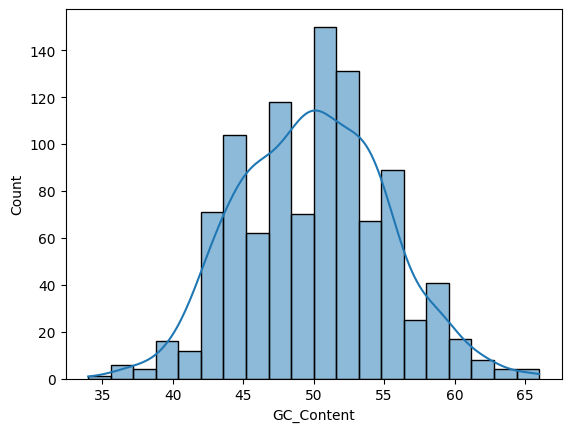

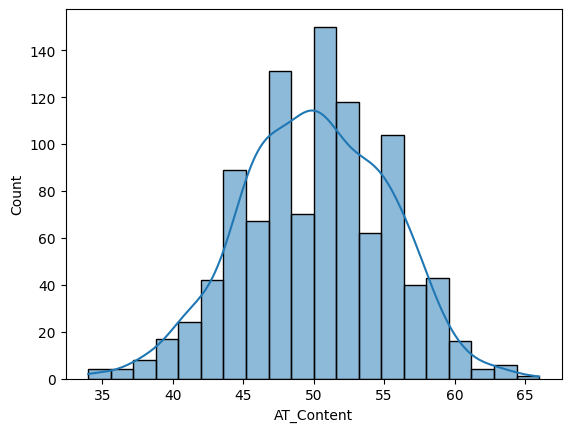

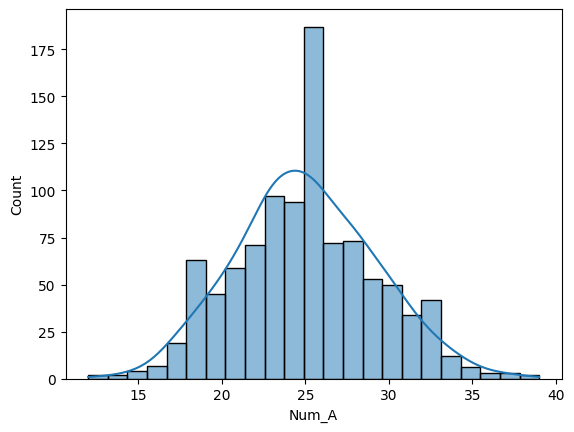

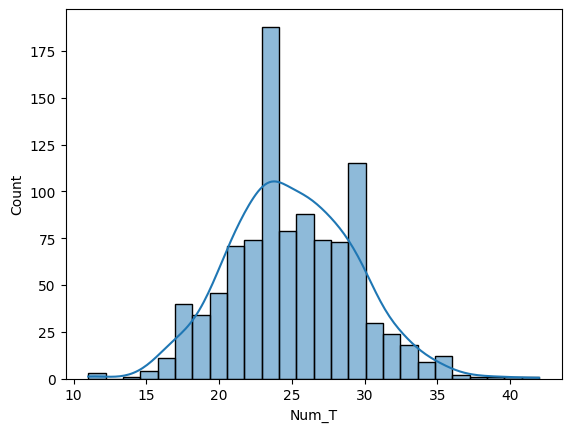

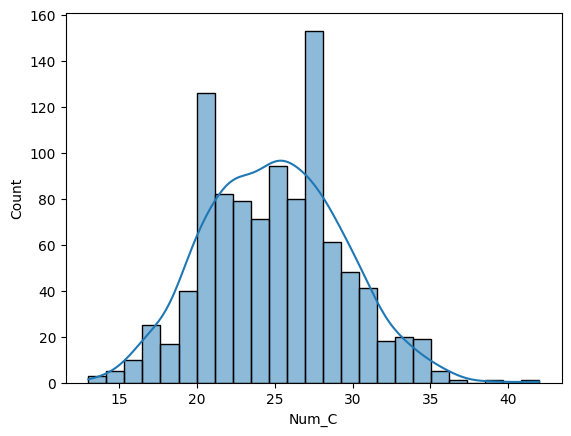

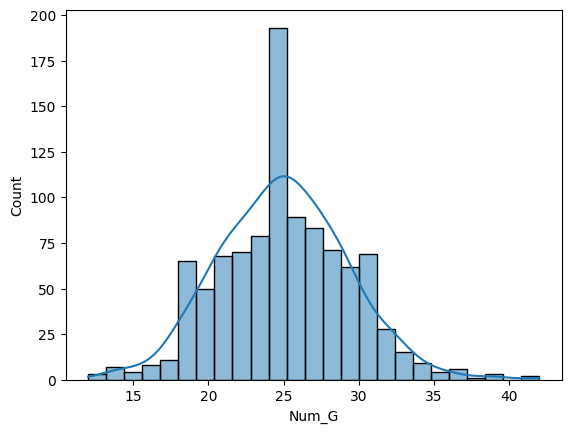

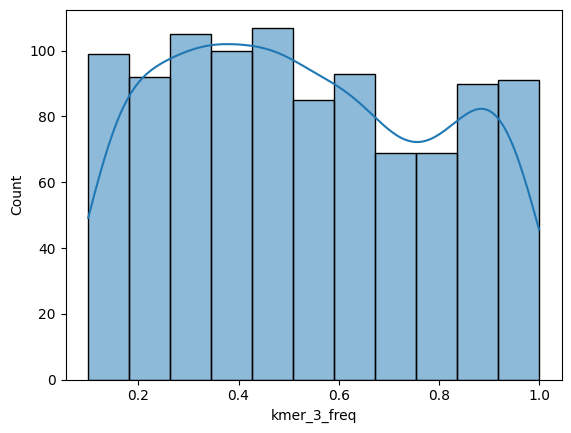

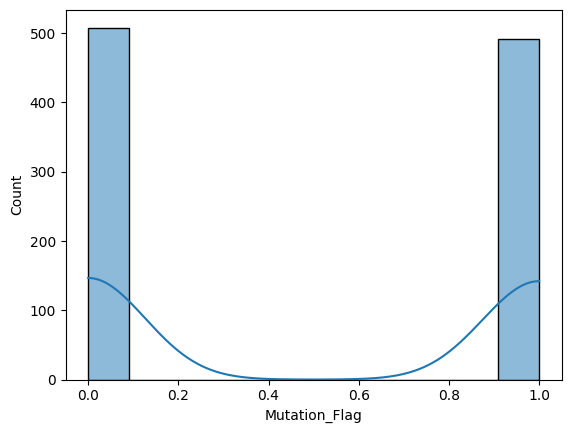

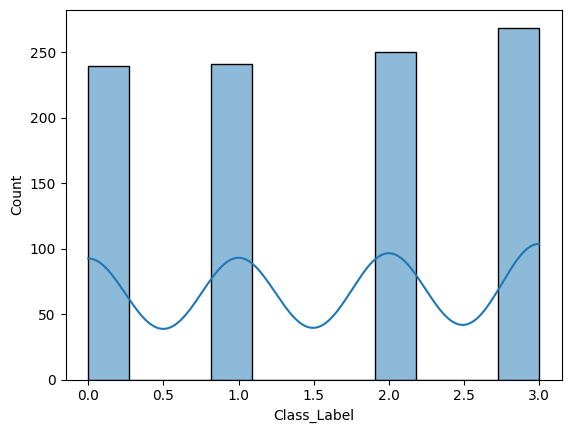

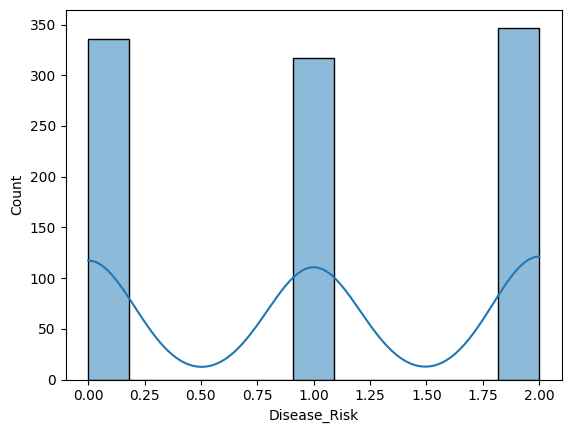

In [56]:
#STEP 6 ::: UNIVARIATE ANALYSIS(STUDY OF ONE FEATURE)
column=df.columns
for a in column:
    sns.histplot(df[a],kde=True)
    plt.show()

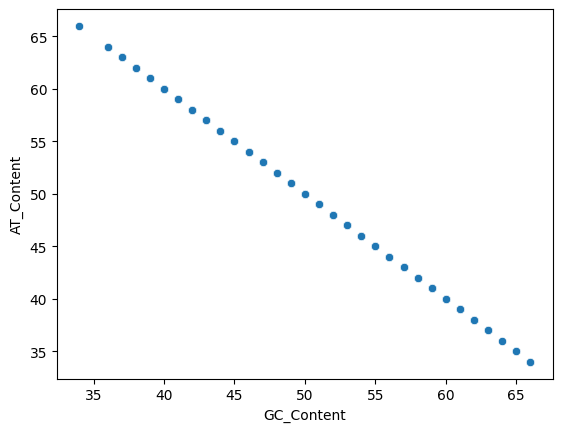

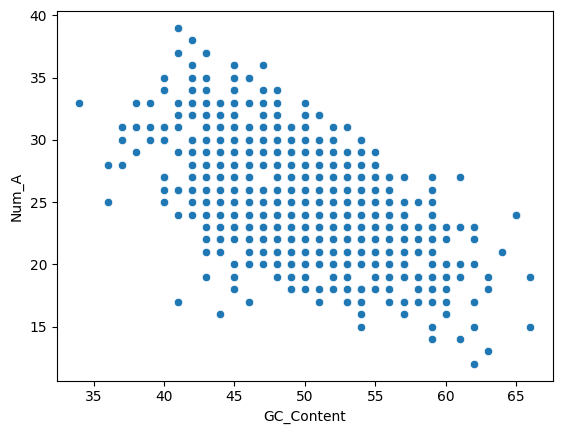

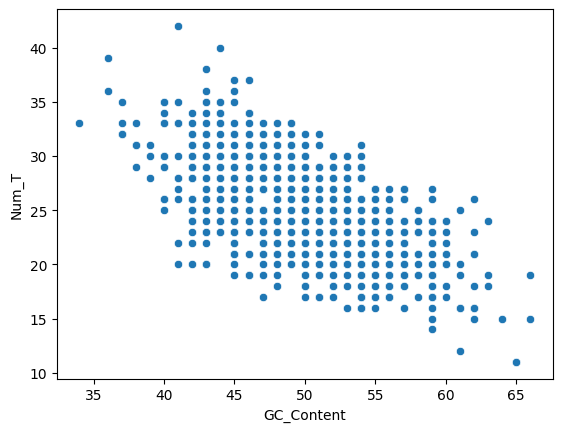

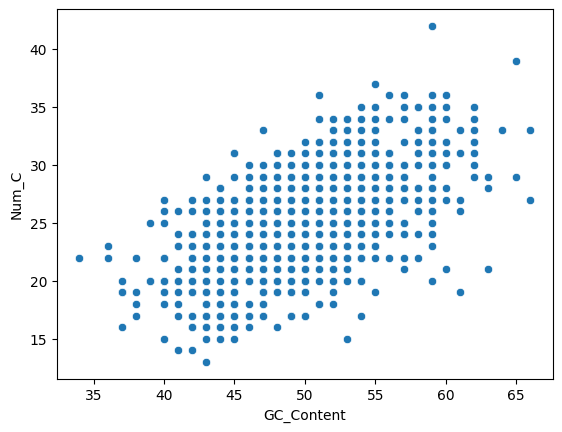

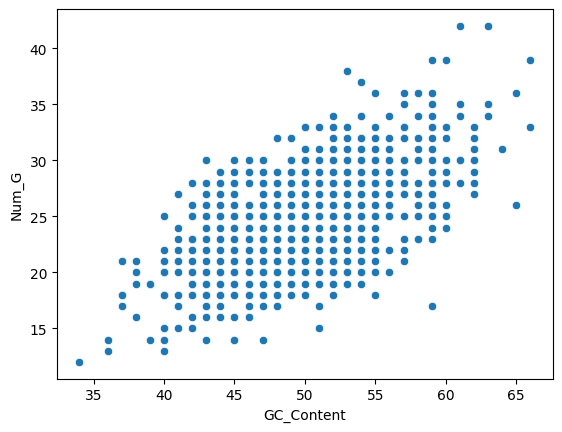

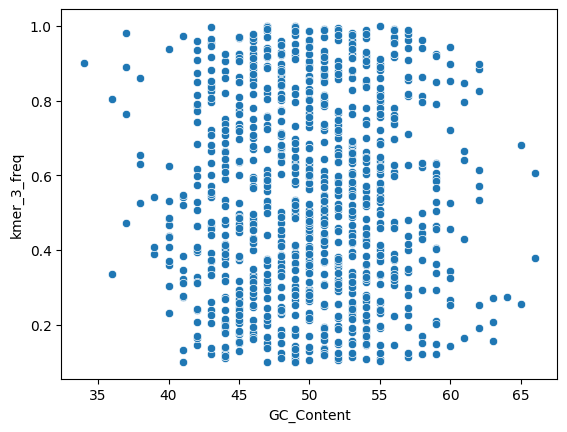

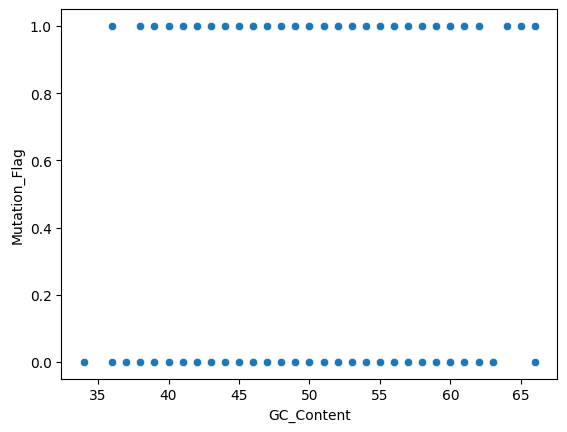

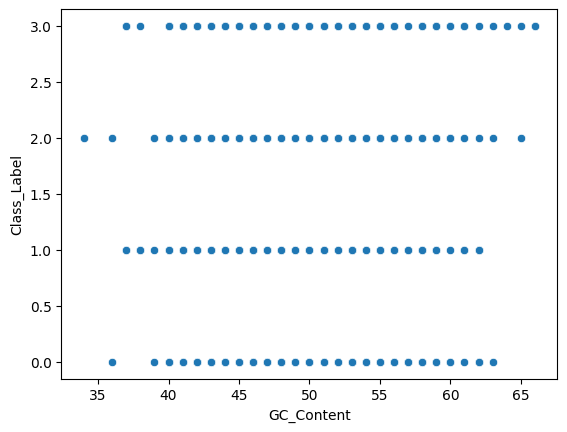

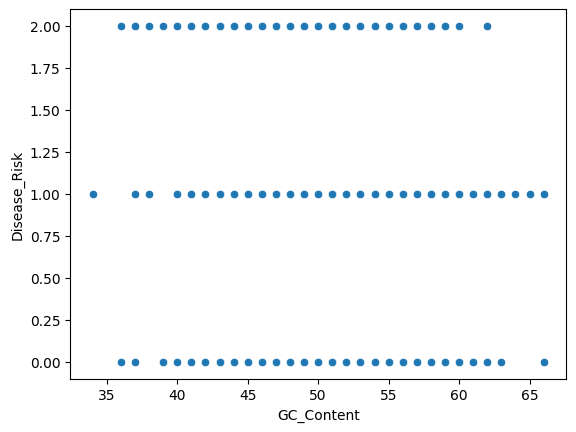

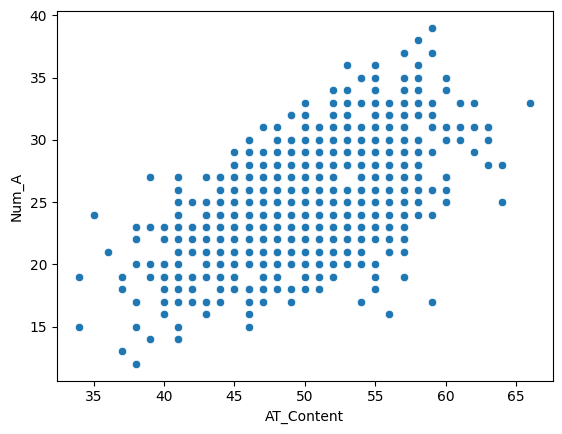

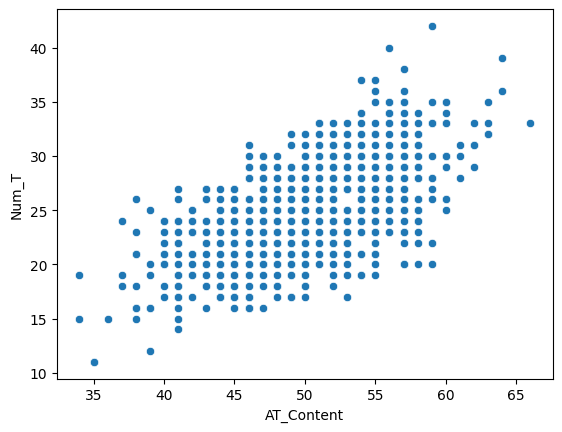

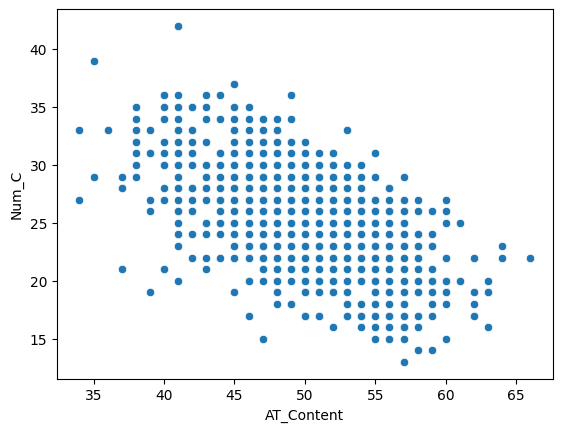

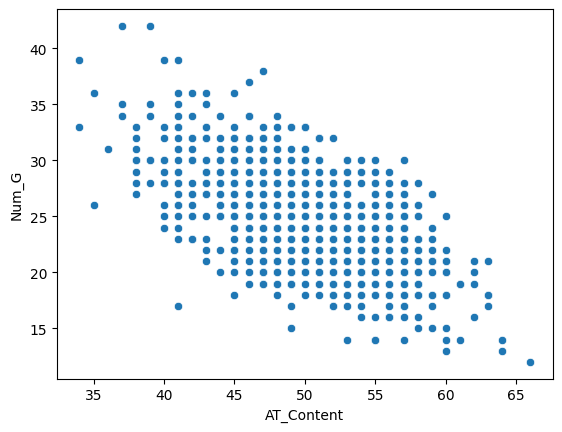

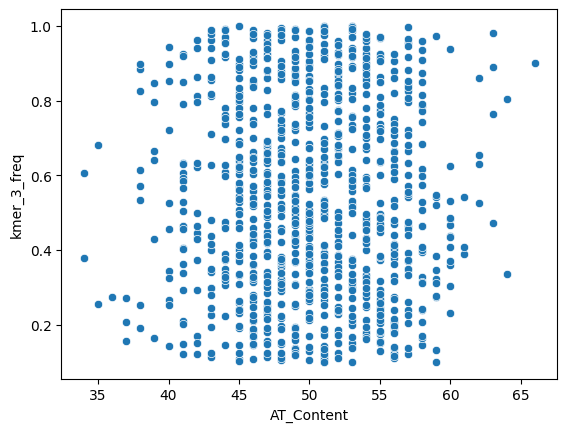

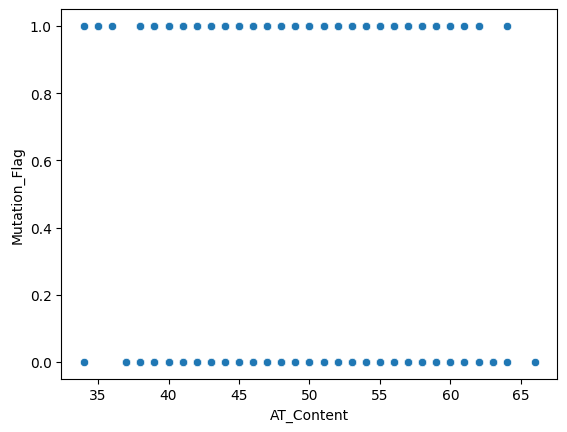

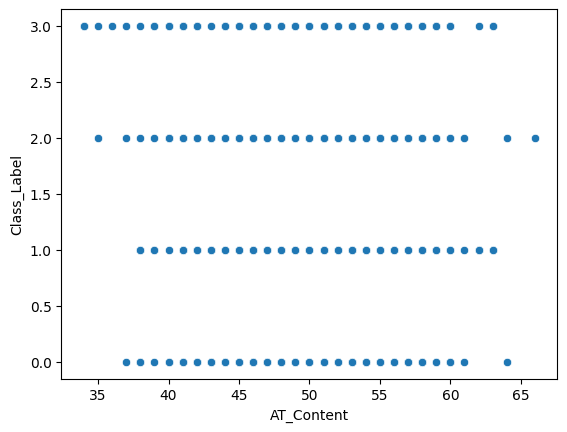

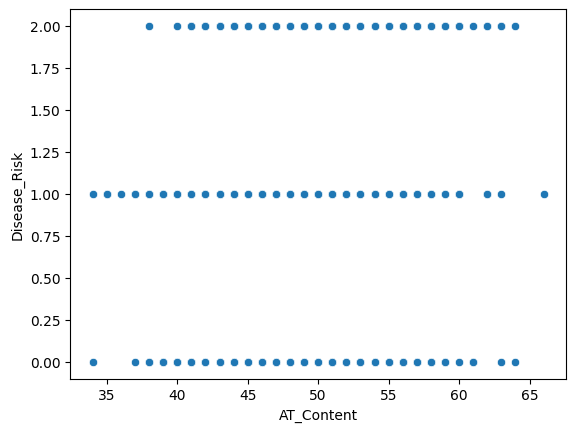

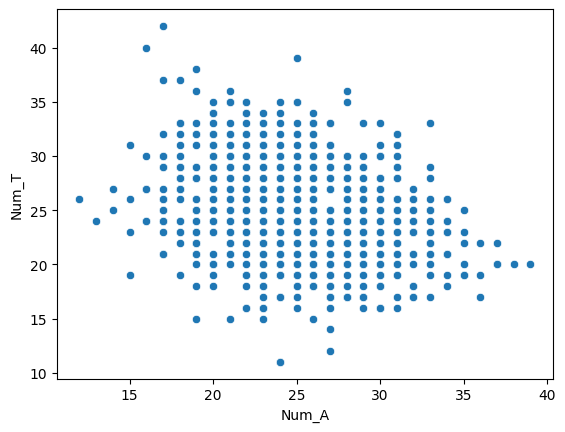

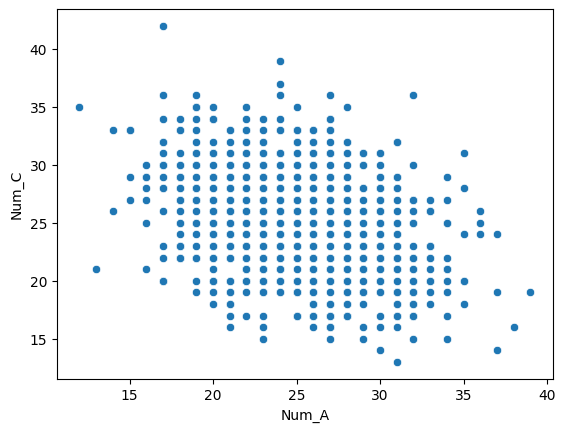

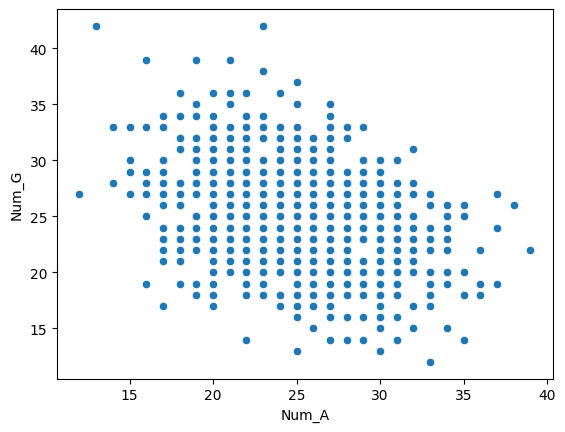

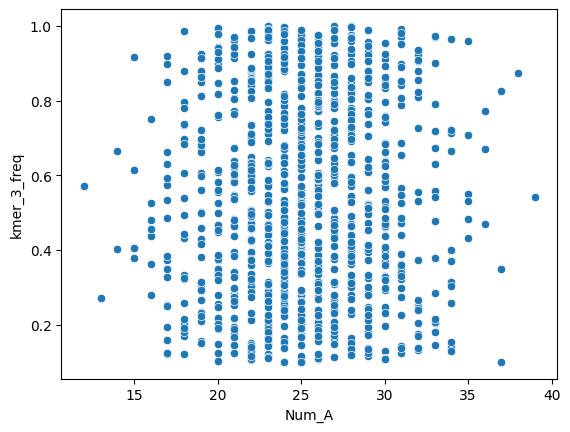

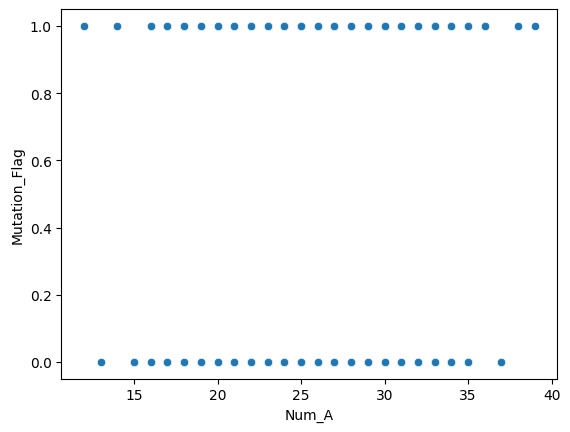

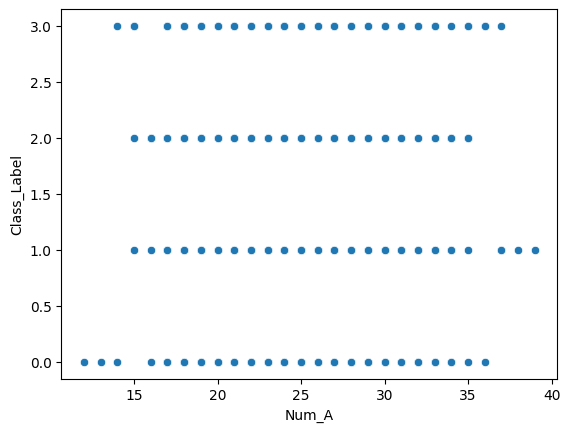

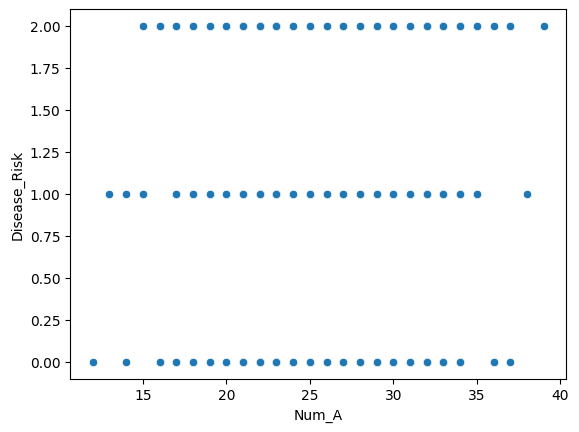

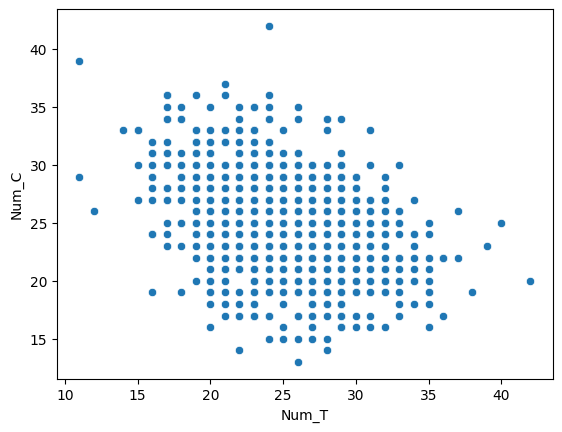

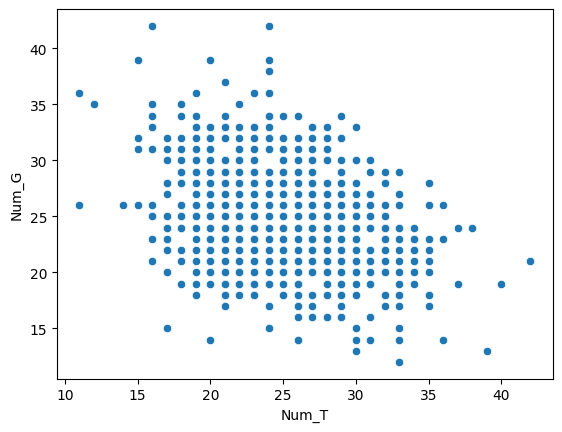

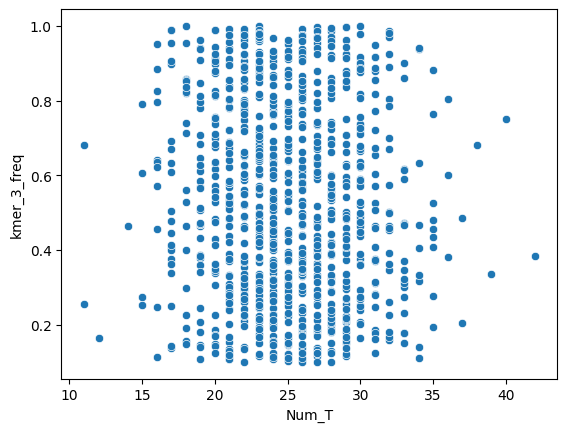

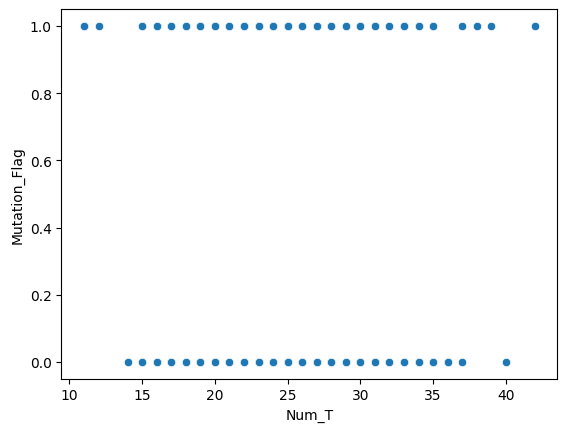

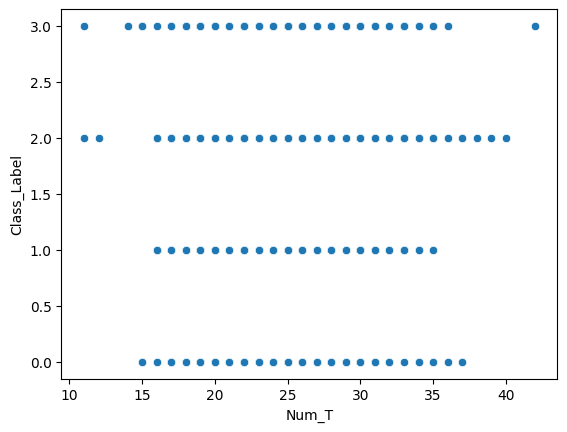

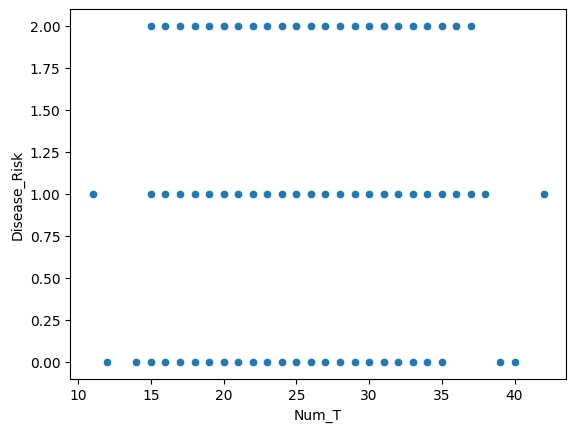

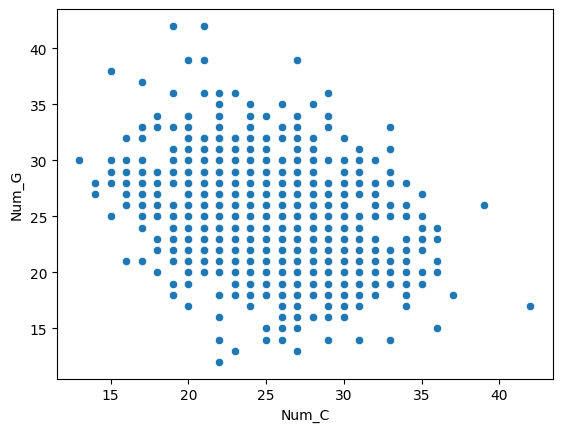

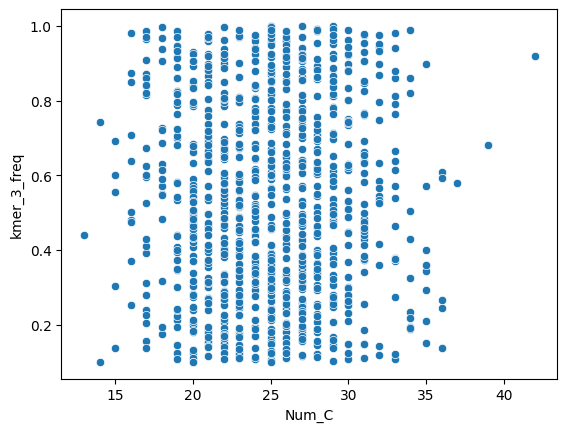

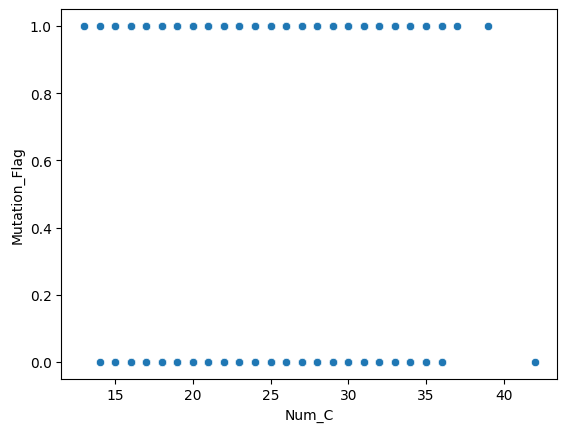

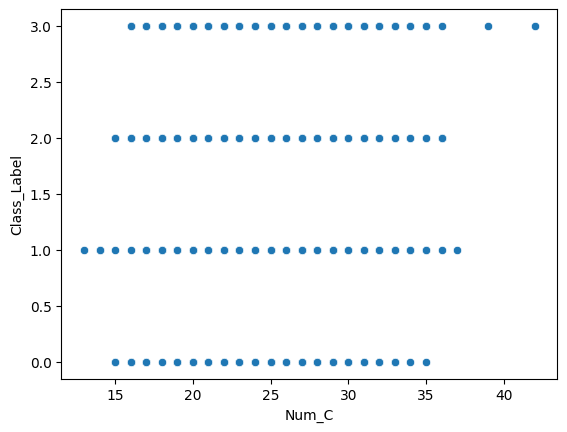

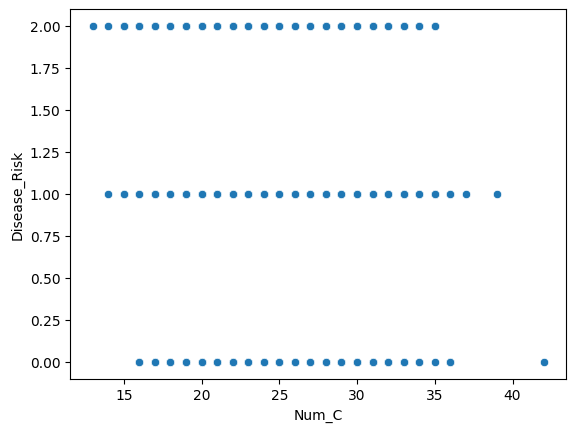

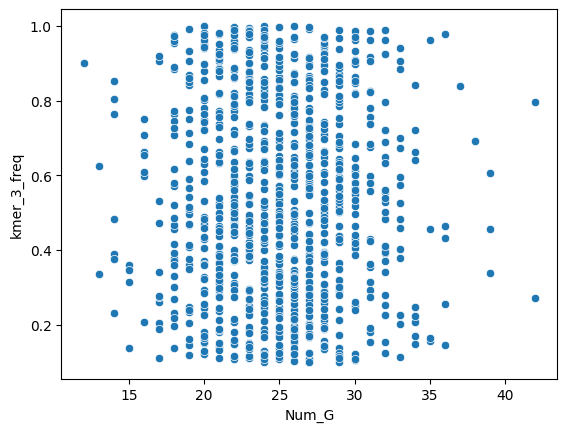

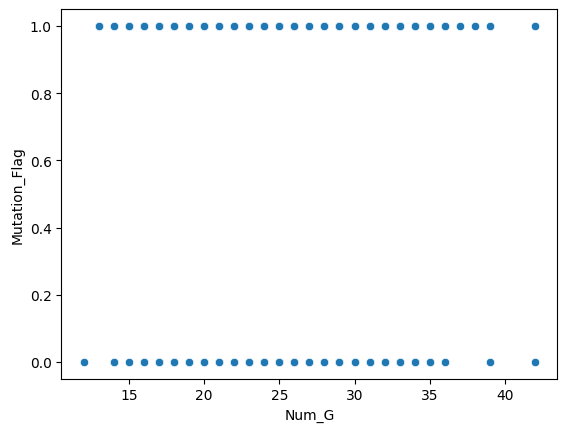

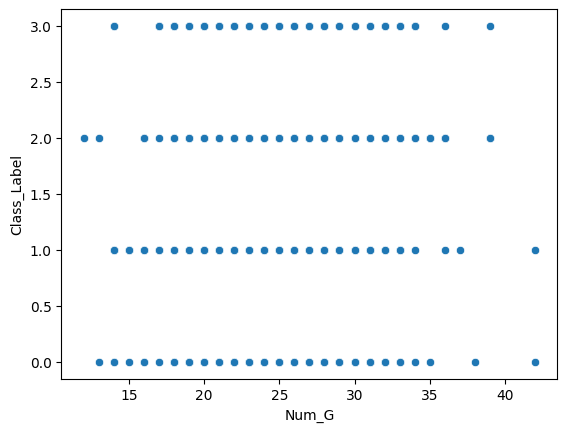

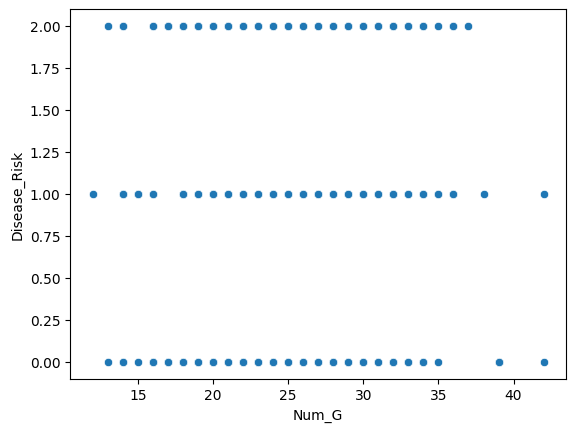

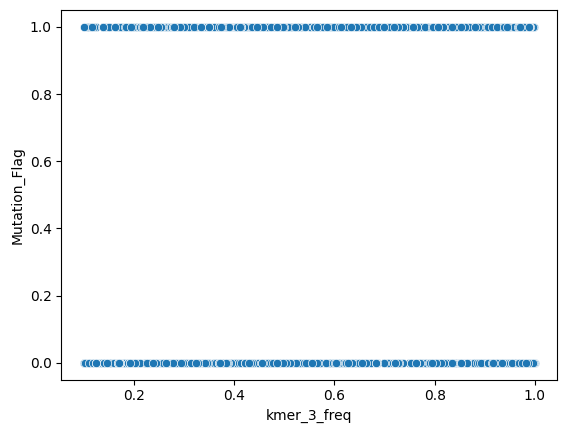

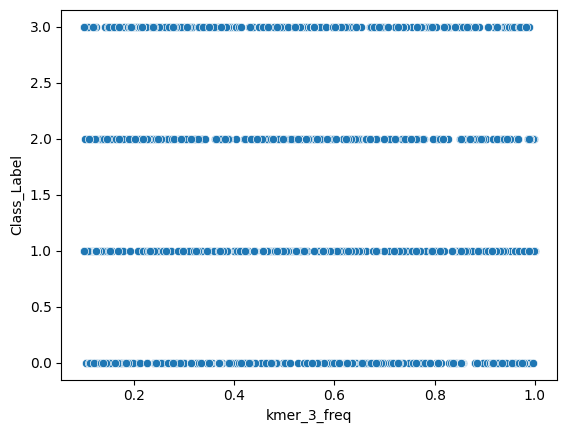

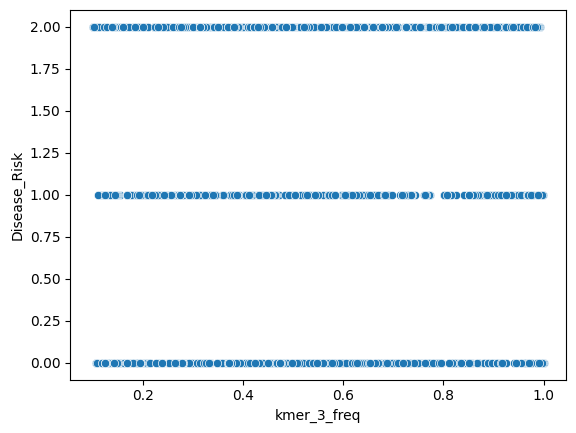

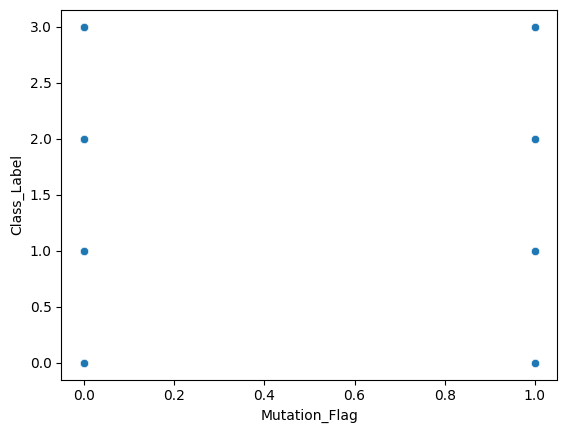

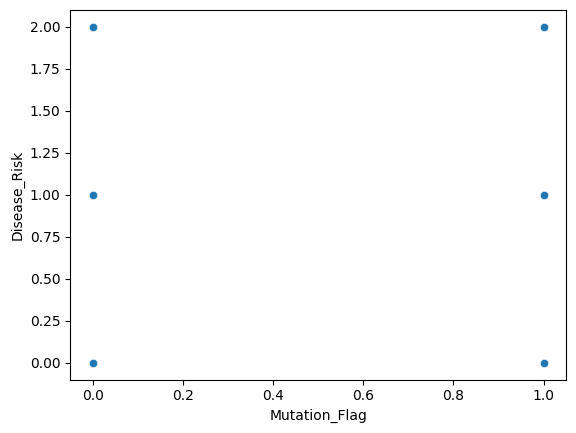

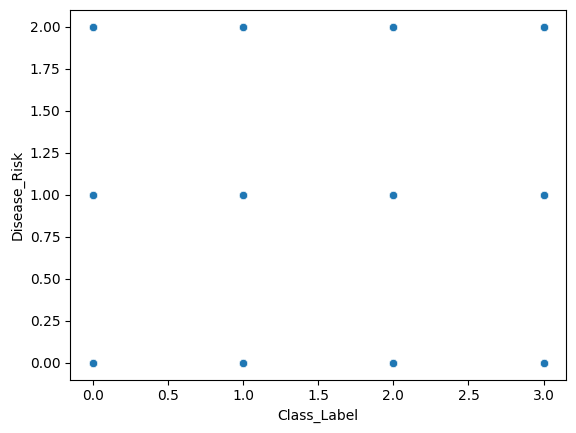

In [57]:
#STEP 7 ::: BIVARIATE ANALYSIS(EXAMINING THE RELATIONSHIP BETWEEN TWO FEATURES).
column=df.columns
for i in range(len(column)):
    for j in range(i+1,len(column)):
        sns.scatterplot(x=df[column[i]],y=df[column[j]])
        plt.show()
     

               GC_Content  AT_Content     Num_A     Num_T     Num_C     Num_G  \
GC_Content       1.000000   -1.000000 -0.591663 -0.617177  0.600363  0.591705   
AT_Content      -1.000000    1.000000  0.591663  0.617177 -0.600363 -0.591705   
Num_A           -0.591663    0.591663  1.000000 -0.269164 -0.337227 -0.368220   
Num_T           -0.617177    0.617177 -0.269164  1.000000 -0.388085 -0.347492   
Num_C            0.600363   -0.600363 -0.337227 -0.388085  1.000000 -0.289467   
Num_G            0.591705   -0.591705 -0.368220 -0.347492 -0.289467  1.000000   
kmer_3_freq      0.005481   -0.005481  0.051670 -0.056977  0.017311 -0.010890   
Mutation_Flag    0.016028   -0.016028 -0.026833  0.007040  0.015265  0.003797   
Class_Label      0.034259   -0.034259 -0.024380 -0.017132  0.013357  0.027539   
Disease_Risk    -0.080627    0.080627  0.041645  0.055675 -0.054260 -0.041806   

               kmer_3_freq  Mutation_Flag  Class_Label  Disease_Risk  
GC_Content        0.005481       0.01

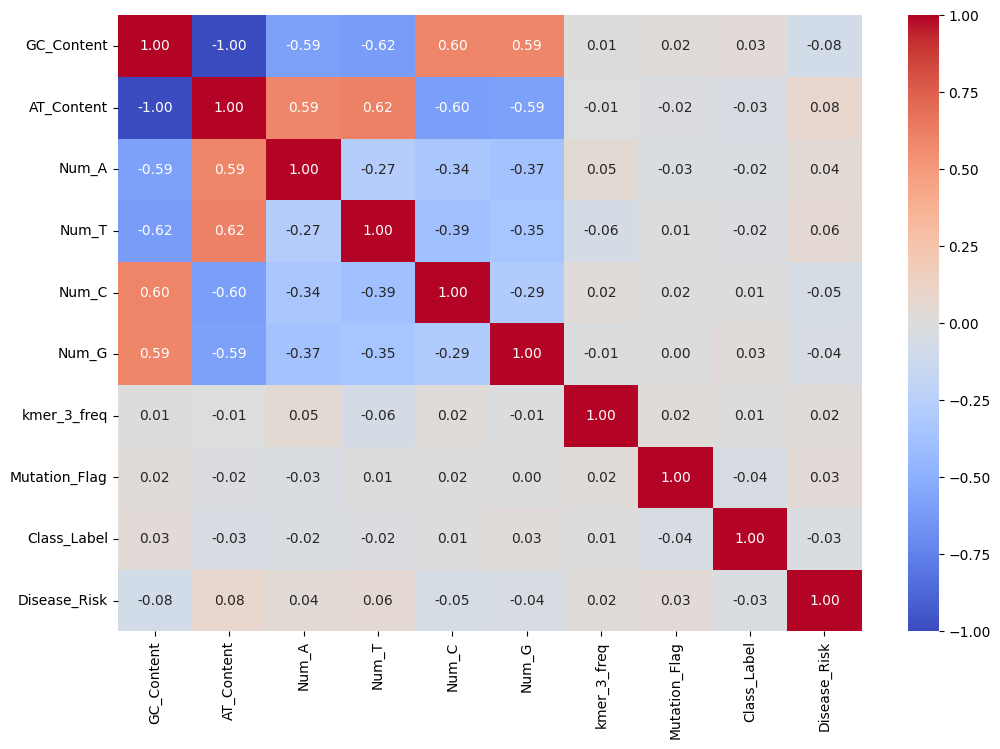

In [58]:
#STEP 8 ::: FIND THE CORRELATION BETWEEN DIFFERENT FEATURES OF THE DATASET AND VISUALIZE THE CORRELATIONS BETWEEN DIFFERENT COLUMNS.
print(df.corr())
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size":10})
plt.show()


In [59]:
#KEY FINDINGS.
#THERE ARE 10 COLUMNS AND 500 ROWS.
#THERE ARE NO OUTLINERS,NO NULL VALUES AND DATA IS PROPER STANDARDIZED.
#SOME COLUMNS HAVE BEEN DROPPED BECAUSE THEY WERE BEHAVING AS OUTLINERS,NOISY OR PREVENTING OVERFITTING.
#UNIVARIATE AND BIVARIATE ANALYSIS IS PERFORMED TO FIND THE RELATIONSHIP BETWEEN DIFFERENT VARIABLE OR COLUMNS.
#CORRELATION IS ALSO FIND TO UNDERSTAND THE RELATIONSHIPS.
#AFTER PERFORMING THE CORRELATION WE FOUND OUT THAT KMER3_FREQ,MUTATION FLAG,CLASS_LABEL,DISEASE RISK HAVE VERY LESS CORRELATION WITH THE OTHER COLUMNS.
#GC_CONTENT,AT_CONTENT,NUM_A,NUM_T,NUM_G HAVE GOOD CORRELATION WITH EACH OTHER.
#AFTER FIDNING AND OBSERVING ALL THESE THINGS WE CAN CONCLUDE THAT THE DATA IS READY TO TRAIN OR WORK ON DIFFERENT ALGORITHM.
#OVER DATASET IS READY TO GET TRAINED AND MAKE PREDICITIONS.


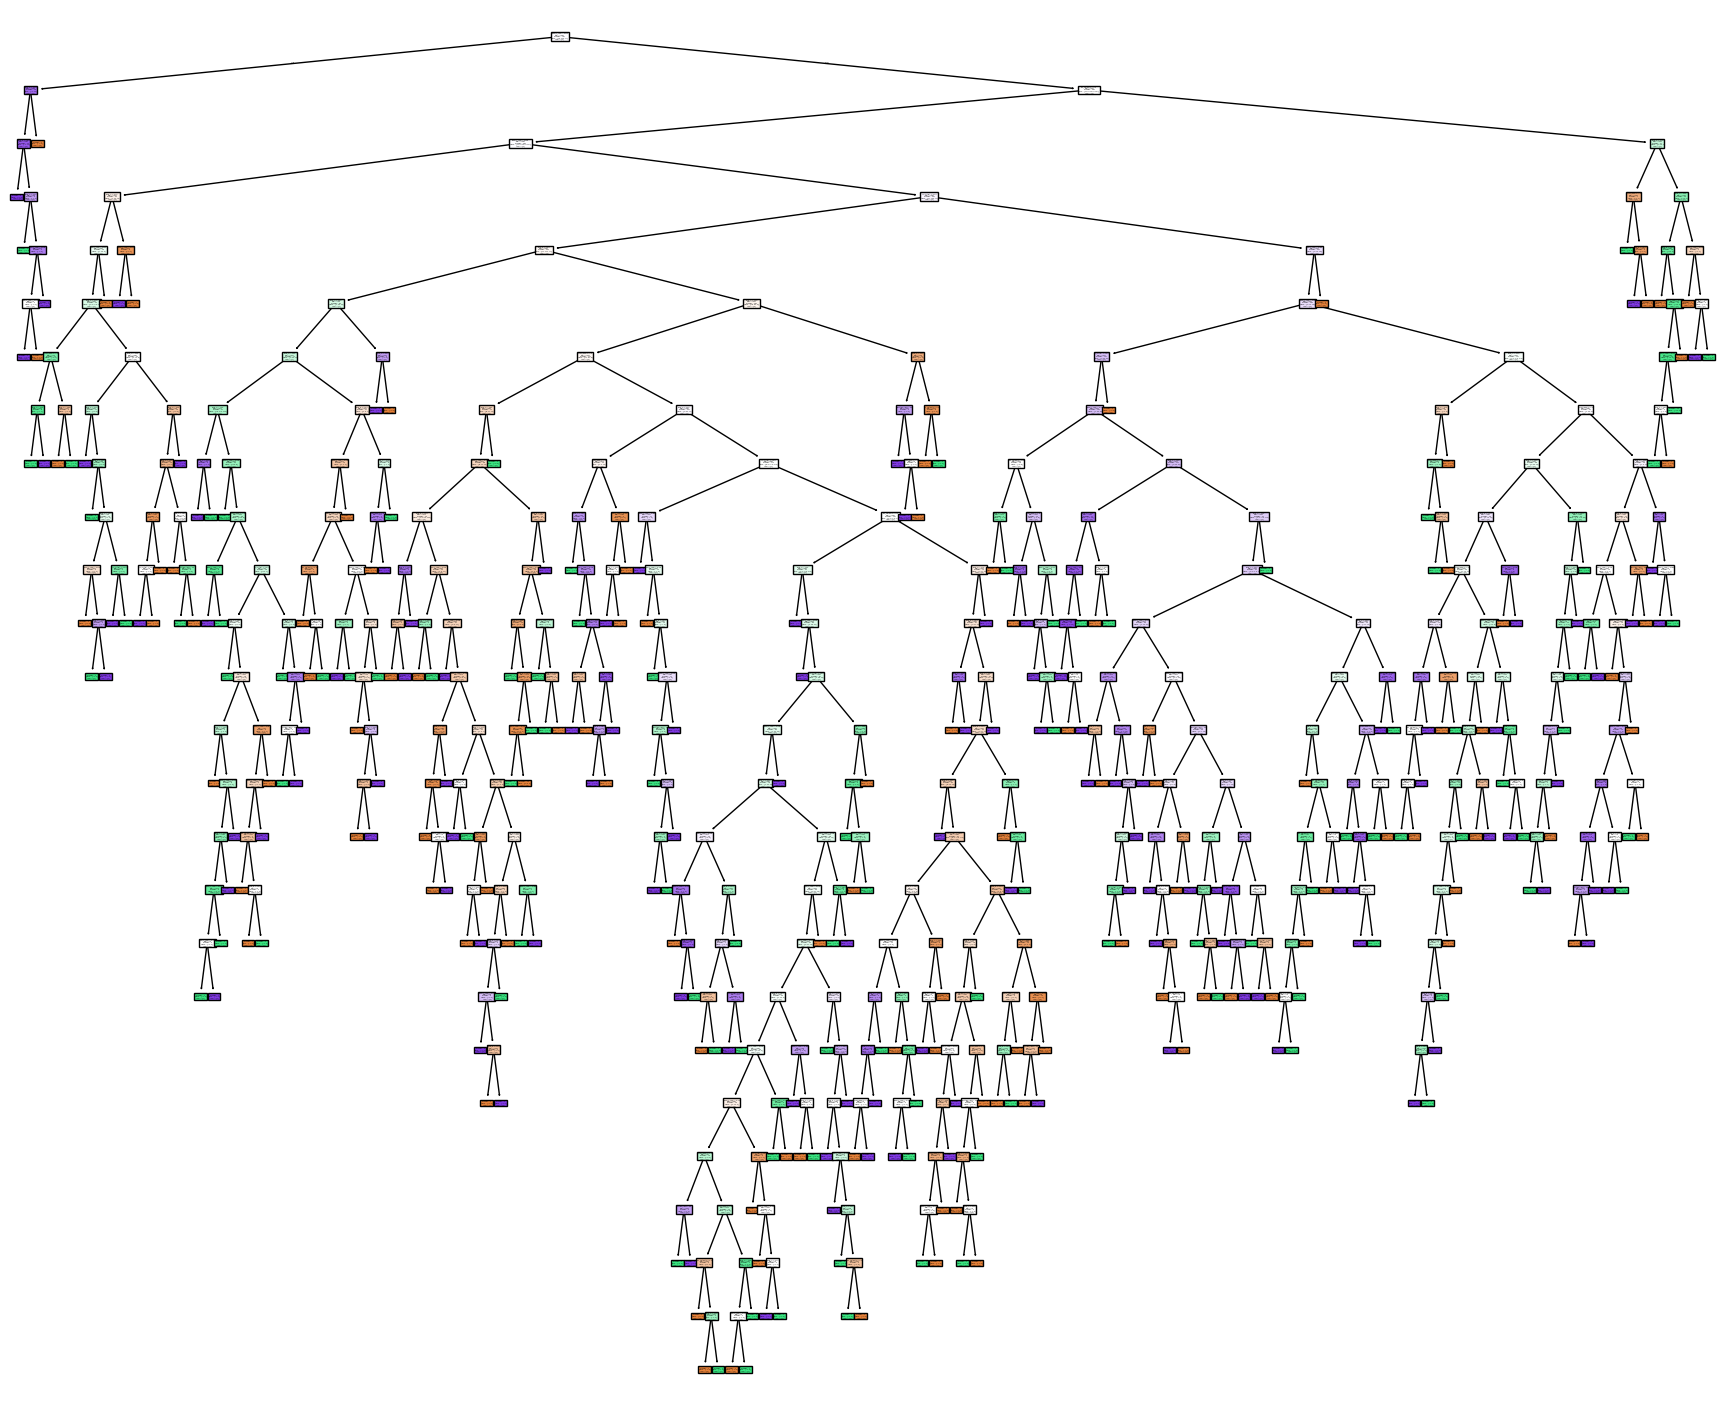

THE PREDICTIONS USING THE TRAINING DATASET. [1 1 2 0 2 1 1 0 2 2 2 2 0 2 1 2 0 0 0 2 0 1 2 1 2 0 0 1 0 0 1 2 0 0 0 0 0
 2 0 1 1 1 1 1 0 2 2 1 1 1 0 0 2 2 2 0 0 2 0 2 0 2 0 0 2 1 1 0 2 2 2 2 1 0
 0 0 2 2 0 0 1 0 1 2 2 1 1 1 0 2 1 1 0 1 1 1 1 0 1 0 0 1 2 1 1 2 0 0 1 1 2
 0 0 2 2 0 1 0 0 2 2 1 2 2 2 0 0 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 0 2 2 2 0 0
 2 0 1 0 1 0 1 1 2 0 2 2 0 0 0 1 2 1 2 0 1 2 1 0 1 2 2 2 1 1 1 2 2 1 1 0 1
 2 1 0 2 0 0 1 2 1 2 2 1 2 2 1 1 0 2 2 1 0 2 1 0 2 1 2 0 0 0 0 2 1 1 1 1 2
 2 0 0 1 2 1 2 0 1 2 0 0 0 0 2 2 0 1 1 2 0 0 0 0 1 0 1 2 2 1 2 0 2 0 0 1 1
 1 1 1 0 0 2 2 1 1 1 1 1 0 2 0 0 1 2 2 1 1 2 1 2 2 1 1 1 1 0 0 2 0 2 1 2 0
 2 1 0 2 0 1 1 2 2 2 1 2 2 0 2 0 2 2 0 0 1 2 2 1 1 1 1 2 1 2 2 1 2 0 2 2 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 2 0 1 1 1 2 1 2 0 2 1 0 1 2 2 0 2 0 0 2 1
 2 1 2 2 2 2 2 2 2 2 1 1 1 2 1 2 1 1 1 1 0 2 0 2 2 0 0 2 2 1 0 0 0 2 1 2 0
 2 1 1 2 0 0 2 2 0 1 1 0 0 2 2 2 1 1 0 1 0 1 0 1 1 2 0 0 2 2 2 0 2 1 0 2 1
 1 0 1 1 2 2 1 2 0 1 1 0 1 0 0 0 0 1 0 2 2 2 1 1 0 0 2 0

In [60]:
#DECISION TREE CLASSIFIER::: DECISION TREE IS A FLOWCHART AND CAN HELP YOU TO MAKE DECISIONS.IT IS A SUPERVISED MACHINE LEARNING USED FOR BOTH REGRESSION AND CLASSIFICATION.THIS CAN BE USE TO MAKE ACCURATE PREDICTION BY ASKING MANY QUESTIONS AND GIVING THE FINAL RESULT.THEY OFFER A CLEAR,INTERPREABLE AND POWERFUL WAY TO MAKE DECISIONS AND PREDICTIONS.HOW IT WORKS FIRST IMPORT,LOAD DATASET,STANDARDIZE THE NON NUMERICAL VALUE TO THE NUMERICAL VALUE,CREATING FEATURES AND TARGET COLUMN,CREATING TRHE DECISIONTREECLASSIFIER OBJECT,THEN FITTING DATA AND THEN PLOTTING THE GRAPH AFTER THIS METHODS YOU CAN MAKE THE PREDICTIONS.
#THE LIBRARY USED TO PERFORM THE DECISION TREE CLASSIFIER IS SKLEARN.
#STEP 1 :::IMPORT ALL THE REQJUIRED LIBRARYS.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as stats
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
#STEP 2 ::: LOAD THE DATASETS.
#df=pd.read_csv("dna.csv")
#STEP 3 ::: CREATE THE FEATURES(INDEPENDENT VARIABLE) AND TARGET(DEPENDENT VARIABLE).
x=sdf[['GC_Content', 'AT_Content', 'Num_A', 'Num_T', 'Num_C', 'Num_G','kmer_3_freq', 'Mutation_Flag', 'Class_Label']]#INDEPENDENT VARIABLE
y=sdf['Disease_Risk']#DEPENDENT VARIABLE
#STEP 4 ::: SPLIT THE DATASET SO THAT OVERFITTING DOES NOT OCCUR AND ALSO THAT OUR MODEL GIVES CORRECT PREDICTIONS FOR THE UNSEEN DATA.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#STEP 5 ::: CREATE THE OBJECT OF THE DECISION TREE.
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
#STEP 6 ::: VISUALIZE THE DECISION TREE
plt.figure(figsize=(22,18))
plot_tree(model, feature_names=x.columns, class_names=True, filled=True)#THE CLASS_NAME ARE USED FOR THE CLASSIFICATION OF THE TARGET VARIABLE.THE PURPOSE OF THE CLASS_NAME=TRUE IS THAT THIS WILL WRITE THE NAME OF THE TARGET VARIALE INSIDE THE LEAF NODE.THE FILLED=TRUE IS USED TO COLOUR THE LEAF NODES LIKE REPRESENTS THE MAJOIRTY OF CLASS OR PREDICTED THE RANGE OF THE CLASS.
plt.show()
#STEP 7 ::: CREATE PREDICTION OBJECT.
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_pred_rawdata=model.predict([[49.0,51.0,23,28,28,21,0.18,0,1]])  # Removed the extra feature
print("THE PREDICTIONS USING THE TRAINING DATASET.",y_pred_train)
print("THE PREDICTIONS USING THE TESTING DATASET.",y_pred_test)
print("CHANCE OF THE RISK OF DISEASE TO  A PERSON WITH  GC_CONTENT 49,AT_CONTENT 51,NUM_A 23,NUM_T 28,NUM_C 28,NUM_G 21,KMER_3_FREQ 0.18,MUTATION_FLAG 0 AND CLASS LABEL 1", y_pred_rawdata)
#CHECKING THE ACCURACY OF THE MODEL USING THE CLASSIFICATION REPORT.
print("THE ACCURACY SCORE OF THE MODEL IS :",accuracy_score(y_test,y_pred_test))
print("THE CLASSIFICATION REPORT OF THE MODEL IS :",classification_report(y_test,y_pred_test))
warnings.filterwarnings("ignore", category=UserWarning)     


<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>


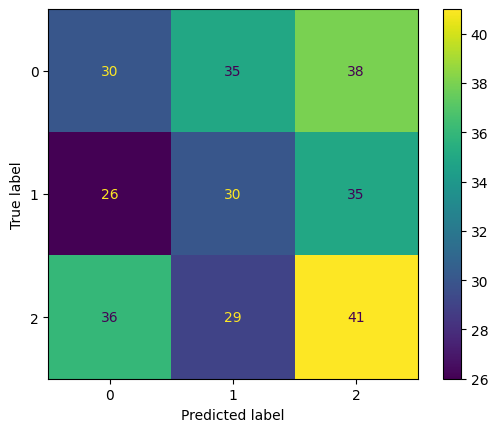

THE ACCURACY OF THE MODEL IS  0.33666666666666667
              precision    recall  f1-score   support

           0       0.33      0.29      0.31       103
           1       0.32      0.33      0.32        91
           2       0.36      0.39      0.37       106

    accuracy                           0.34       300
   macro avg       0.33      0.34      0.33       300
weighted avg       0.34      0.34      0.34       300



In [61]:
#TO CHECK THE ACCURACY OF THE MODEL USING THE CONFUSION MATRIX.THE MODEL CONSTRUCT A TABLE WHICH CONSIST 4 VALUES TP(VALUES PREDICTED POSITIVE AND WERE ACTUALLY POSITIVE ),TN(VALUES PREDICTED POSITIVE AND WERE NEGATIVE),FP(VALUES PREDICTED WRONG AND WERE ACTUALLY WRONG),FN(VALUES PREDICTED WRONG BUT WERE ACTUALLY CORRECT).THIS VALUE CAN BE USED TO FIND THE ACCURACY(HOW OFTEN THE MODEL IS CORRECT),PRECISION(OUT OF ALL PREDICITIONS HOW OFTEN WERE CORRECT),F1-SCORE(BALANCE BETWEEN THE PRECISION AND RECALL) AND SENSITIVITY(OUT OF ALL POSITIVE HOW MANY WE CORRECTLY FIND).
#IMPORT THE SKLEARN LIBRARY FOR THE CHECKING THE ACCURACY OF THE MODEL
from sklearn import metrics
#CREATE THE ACTUAL VS PREDICTED OBJECT OF THE MODEL YOU CREATED
actual=y_test
predicted=model.predict(x_test)
#CREATE THE CONFUSION MATRIX OBJECT AND PASS THE ACTUAL AND THE PREDICTED VARIABLE.
confusion_matrix=metrics.confusion_matrix(actual,predicted)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels = model.classes_)
print(type(cm_display))
#PLOT THE DIAGRAM.
cm_display.plot()
plt.show()
#CALCULATE ACCURACY,F1_SCORE,SENSITIFVITY AND PRECISIONS.
Accuracy = metrics.accuracy_score(actual, predicted)
#Precision = metrics.precision_score(actual, predicted)
#F1_score = metrics.f1_score(actual, predicted)
#Sensitivity_recall = metrics.recall_score(actual, predicted)
print('THE ACCURACY OF THE MODEL IS ',Accuracy)
#print('THE PRECISION OF THE MODEL IS ',Precision)
#print('THE F1_SCORE OF THE MODEL IS  ',F1_score)
#print('THE SENSITIVITY OF THE MODEL IS ',Sens)
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(x_test)))#GIVES THE CLASSIFICATION REPORT WITH THE TABLE AND THE CONTENTS OF THE TABLE ARE VALUES LIKE PRECISION,RECALL,SUPPORT,F1_SCORE
#THROUGH THIS METHOD WE CAN FIND OUT THE ACCURACY SCORE OF OUR TRAINED MODEL.

In [62]:
#RANDOM FOREST ::: IT IS A SUPERVISED MACHINE LEARNONG ALGORITHM USED FOR BOTH CLASSIFICATION AND REGRESSION PROBLEMS.IT RANDOMLY SPLITS THE DATASETS AND THEN CREATE DECISION TREES.EACH DECISION TREE WORKS AT DIFFERENT PARTS OF THE DATA AND THE RESULT IS COMBINED.THIS METHOD HELPS FOR OVERFITTING AND MAKE OVERALL PREDICITIONS MORE ACCURATE AND TRUSTWORTHY.T0 FIND THE ACCURACY OF THE MODEL AFTER COMBINING THE DECISION TREES.THE CLASSIFICATION_REPORT HELPS TO GIVE FOUR METERICS(PRECISION,F1_SCORE[COMBINE PERFORMANCE OF PRECISION AND RECALL],SUPPORT[TELLS HOW MANY REAL SAMPLES ARE THERE OF A SPECIFIC CLASS ],RECALL[TELLS HOW MANY ACTUAL POSITIVES WERE CORRECTLY IDENTIFIED]) TO EVALUTE THE MODEL USED FOR CLASSIFICATION CASES ONLY.
#THE SKLEARN LIBRARY IS USED FOR RANDOM FOREST.
#STEP 1 ::: IMPORT ALL THE REQUIRED LIBRARYS.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#LOAD THE DATASET.
#WE ALDREADY HAVE READY DATASET SDF.
#STEP 3 ::: CREATE THE FEATURES(INDEPENDENT) AND TARGET(DEPENDENT) VARIABLES.
x=sdf[['GC_Content', 'AT_Content', 'Num_A', 'Num_T', 'Num_C', 'Num_G','kmer_3_freq', 'Mutation_Flag', 'Class_Label']]#INDEPENDENT VARIABLE
y=sdf['Disease_Risk']#DEPENDENT VARIABLE
#STEP 4 ::: SPLIT THE DATASET.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#STEP 5 ::: CREATING THE RANDOM CLASSIFIER OBJECT AND PASSING THE N_ESTIMATORS(NO OF DECISION TRESS TO CREATE) AND RANDOM_STATE.AND FIT THE DATA.
r_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
r_classifier.fit(x_train,y_train)
#STEP 6 ::: CREATING THE PREDICITIONS OBJECT.
y_pred=r_classifier.predict(x_test)
#STEP 7 ::: FINDING THE ACCURACY SCORE AND ALSO PRINTING THE CLASSIFICATION REPORT.
print("ACCURACY SCORE",accuracy_score(y_test,y_pred))
print("CLASSIFICATION REPORT",classification_report(y_test,y_pred))

y_pred_rawdata=model.predict([[42.0,58.0,34,24,27,15,0.314,1,1]]) 
print("CHANCE OF THE RISK OF DISEASE TO  A PERSON WITH  GC_CONTENT 49,AT_CONTENT 51,NUM_A 23,NUM_T 28,NUM_C 28,NUM_G 21,KMER_3_FREQ 0.18,MUTATION_FLAG 0 AND CLASS LABEL 1", y_pred_rawdata)


ACCURACY SCORE 0.31666666666666665
CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.31      0.30      0.30       103
           1       0.30      0.34      0.32        91
           2       0.34      0.31      0.33       106

    accuracy                           0.32       300
   macro avg       0.32      0.32      0.32       300
weighted avg       0.32      0.32      0.32       300

CHANCE OF THE RISK OF DISEASE TO  A PERSON WITH  GC_CONTENT 49,AT_CONTENT 51,NUM_A 23,NUM_T 28,NUM_C 28,NUM_G 21,KMER_3_FREQ 0.18,MUTATION_FLAG 0 AND CLASS LABEL 1 [1]


Train Accuracy: 1.0
Test Accuracy: 1.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_bagging.py:923: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_bagging.py:923: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_bagging.py:923: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_bagging.py:923: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Library/Frameworks/

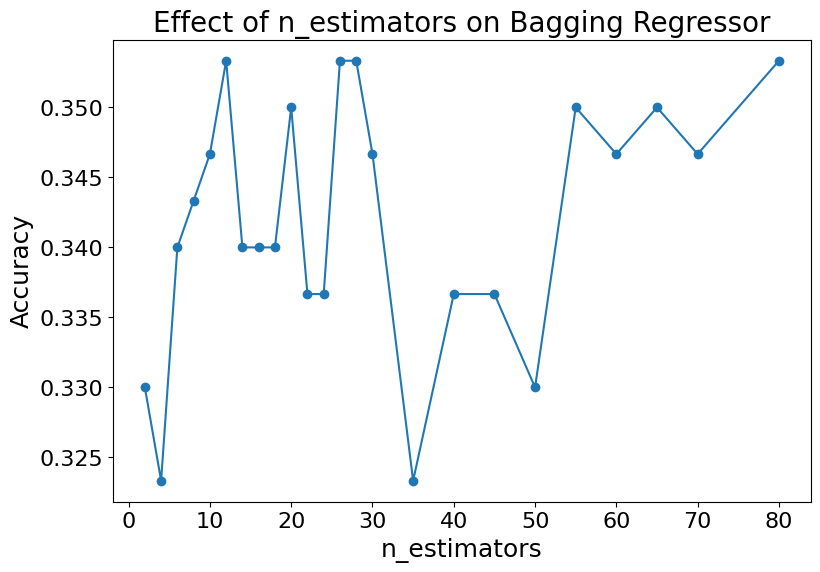

Best n_estimators: 12
Best Accuracy: 0.35333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.34      0.33       103
           1       0.37      0.41      0.39        91
           2       0.39      0.32      0.35       106

    accuracy                           0.35       300
   macro avg       0.36      0.36      0.35       300
weighted avg       0.36      0.35      0.35       300



In [63]:
#BOOTSTRAP AGGREGATION :::  THIS IS A SUPERVISED MACHINE LEARNING ALGORITHM THAT IS USED FOR BOTH REGRESSION(BAGGINGREGRESSOR) AND CLASSIFICATION(BAGGINGCLASSIFIER).IT TAKES MANY DATASETS AND CREATE MANY RANDOM DATASETS(SOME DATAPOINTS CAN BE REPEATED).IT USES ALGORIUTHM LIKE DECISION TREE,RANDOM FOREST ETC.FOR FIRST WE ARE USING THE DECISION TREE.IN THIS WE CREATE MANY DECISION TREES EACH DECISION TREE PROCESS DIFFERENT DATAPOINTS.WHEN WE TRY TO PREDICT SOMETHING ALL THE DECISION TREE PASSS THEIR PREDICTIONS AND WE COMBINE THE PREDICTIONS IF IT IS A CLASSIFICATION PROBLEM WE FIND CHOOSE THE BEST PREDICTION BY FINDING THE MAJORITY OF THE VOTE IF IT IS A REGERESSION PROBLEM WE TAKE AVERAGE OF ALL.AFTER COMBINING DIFFERENT MODELS OR DIFFERENT DECISION TREE WE CREATE A BAGGING CLASSIFIER WHICH PASS N_ESTIMATORS PARAMETER.IT IS A PARAMETER THAT HELPS TO CREATE A NUMBER OF DIFFERENT DECISION TREE AND TRAIN AND FIND THE ACCURACY SCORE WHICH EVER VALUE OF N-ESTIMATORS GETS HEIGHEST VALUE THAT MUCH NO OF DATA IS SPLIT  AND THAT MUCH DECSION TREE IS MADE.OOB IS A OUT OF BAG.WHEN WE TRAIN THE DIFFERNET DECISION TREES SOME DATA IS LEFT OUT THAT DATA IS CALLED OOB.OOB DATA IS USED TO TEST EACH TREE,WITHOUT NEEDING A SEPERATE TEST SET.THE OOB SCORE IS LIKE A QUICK INTERNAL TEST OF THE MODEL.IT HELPS YOU TO ESTIMATE THE PREFORMANCE WITHOUT USING THE TEST SET.BUT IT IS NOT PERFECT IN BINARY CLASSIFICATION OOB CAN GIVE YOU SLIGHTLY WORSE ERROR TO ESTIMATE THE REALITY.SO IT SHOULD ONLY USED FOR THE QUICK CHECK NOT TO JUDGE THE MODEL.
#FOR THE BOOTSTRAP WE USE THE SKLEARN LIBRARY.
#STEP 1 ::: IMPORT REQUIRED LIBRARY.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import warnings
#STEP 2 ::: LOAD THE DATASET.
#WE HAVE ALREADY DATASET.
#STEP 3 ::: CREATE THE INDEPENDENT(FEATURES) AND DEPENDENT(TARGET) VARIABLES.
x=sdf[['GC_Content', 'AT_Content', 'Num_A', 'Num_T', 'Num_C', 'Num_G','kmer_3_freq', 'Mutation_Flag', 'Class_Label']]#INDEPENDENT VARIABLE
y=sdf['Disease_Risk']#DEPENDENT VARIABLE
#STEP 4 ::: SPLIT THE DATASET.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#STEP 5 ::: CREATE THE OBJECT OF THE DECISION TREE AND FIT THE DATA.
model=DecisionTreeClassifier(random_state=42)
model.fit(x,y)
#STEP 6 ::: AFTER CREATING THE DECISION TREE CREATE THE ACCURACY SCORE.
y_pred=model.predict(x_test)
print("Train Accuracy:", accuracy_score(y_train, model.predict(x_train))) 
print("Test Accuracy:", accuracy_score(y_test, y_pred))
#print("THE CLASSIFICATION REPORT",classification_report(y_test,y_pred))
#AFTER CREATING THE SINGLE DECISION TREE NOW WE CAN CREATE A BAGGING CLASSIFIER WHICH IS USED TO CREATE DIFFERENT DECISION TREE AND DIVIDE THE DATASETS.
#STEP 7 ::: CREATING THE ESTIMATOR ARRAY TO PASS TO BAGGING CLASSIFIER OBJECT FOR CREATING THE DIFFERENT NUMBER OF THE DECISION TREES.
estimator_range = [2, 4, 6, 8, 10, 12, 14, 16,18,20,22,24,26,28,30,35,40,45,50,55,60,65,70,80]
models = []
scores = []#THIS WILL CONTAIN THE DIFFERENT SCORE OF THE ACCURACY AFTER CREATING MANY DECISION TREES.WHICHEVER NUMBER OF THE DECISION TREE GIVES HIGHEST ACCURACY THAT MUCH NUMBER OF DECISION TREES ARE REQUIRED TO MAKE ML MODEL EFFECTIVE.
#STEP 8 ::: CREATE A LOOP TO CHECK THE ACCURACY SCORE FOR DIFFERENT DECISION TREE.
for n_estimators in estimator_range:
    clf=BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n_estimators,
        random_state=22,
        oob_score=True
    )
    clf.fit(x_train, y_train)
    models.append(clf)
    scores.append(accuracy_score(y_test, clf.predict(x_test)))
    
#STEP 9 ::: VISUALIZE THE BAGGING CLASSIFIER.
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores, marker='o')
plt.xlabel("n_estimators", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.tick_params(labelsize=16)
plt.title("Effect of n_estimators on Bagging Regressor", fontsize=20)
plt.show()

best_n = estimator_range[scores.index(max(scores))]
print("Best n_estimators:", best_n)
print("Best Accuracy:", max(scores))
print("Classification Report:\n", classification_report(y_test, models[scores.index(max(scores))].predict(x_test)))

warnings.filterwarnings("ignore", category=UserWarning)
